# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Libraries for boosting 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# To tune different models
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer
)

In [ ]:
# Giving colab access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the dataset
data = pd.read_csv('/content/drive/MyDrive/Curso_DA/EasyVisa.csv')

## Data Overview

In [ ]:
# Having a glimpse of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 25480 rows and 12 columns.


In [ ]:
# Checking the type of data and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* We have 9 object type columns and three numerical columns.

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

* There are no duplicates in the data


In [ ]:
# Rechecking for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# Having a statistical summary of the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


* It doesn't make sense having a negative number of employees.
* Let's take a look at these rows.

In [ ]:
# Sigleing out rows with negative values for number of employees
data.loc[data['no_of_employees']<= 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


* These negative values seem to be a mistake; let's change them to positive values.

In [ ]:
# Changing negative to positive values in column
data['no_of_employees'] = data['no_of_employees'].abs()
# Checking there are no negative values left
data.loc[data['no_of_employees']<= 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


## Exploratory Data Analysis (EDA)

## Functions for EDA

In [ ]:
#This function creates two subplots: a boxplot and a histogram plot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# This function creates labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# This function plots distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# This function plots a stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate analysis

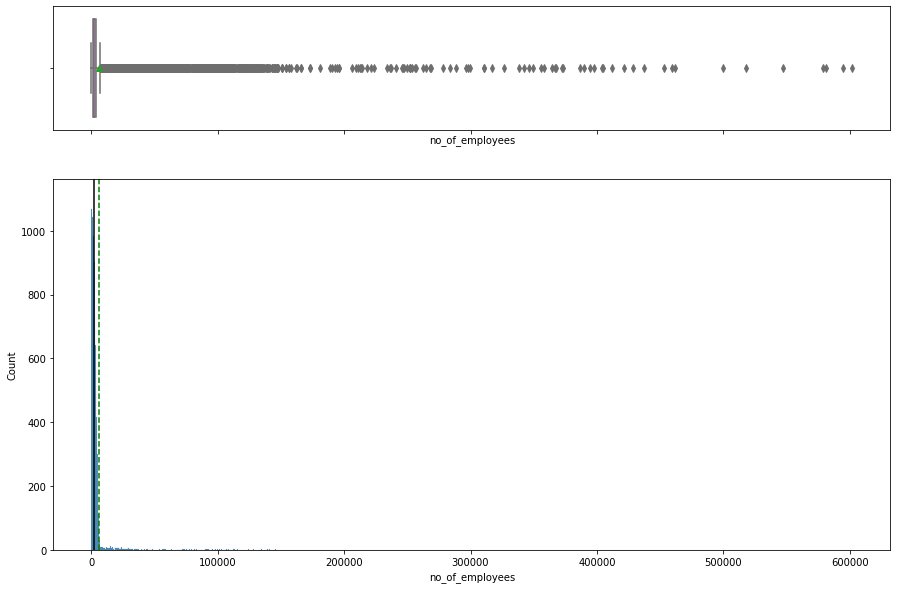

In [ ]:
histogram_boxplot(data, 'no_of_employees')

* 'Number of employees' has a heavily right-skewed distribution.
* There are applicant companies with more than 600,000 employees. 
* Let's see how these data look without all those outliers.

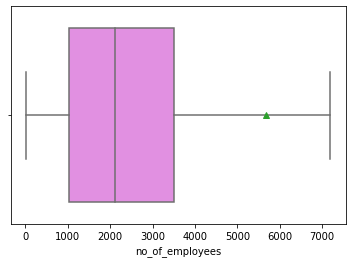

In [ ]:
# Plotting a single boxplot
sns.boxplot(
        data=data, x='no_of_employees', showmeans=True, showfliers=False, color="violet"
    )

* Excluding the outliers, the number of employees in applicant companies ranges from 0 to little more than 7,000.
* As we saw in the data description, the mean value is 5,667. 

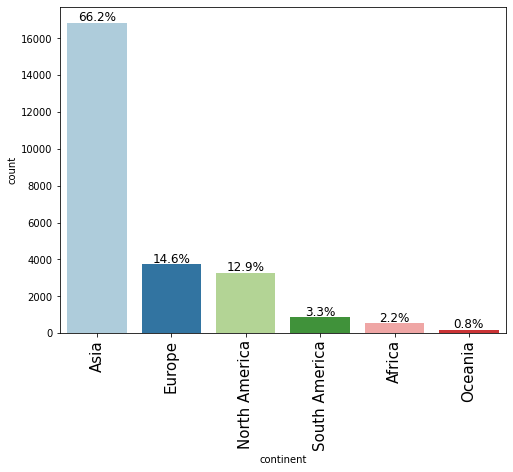

In [ ]:
labeled_barplot(data, 'continent', perc=True, n=None)

* Most applications come from Asia (~66%).
* Europe (15%) and North America (~13%) are far behind. 

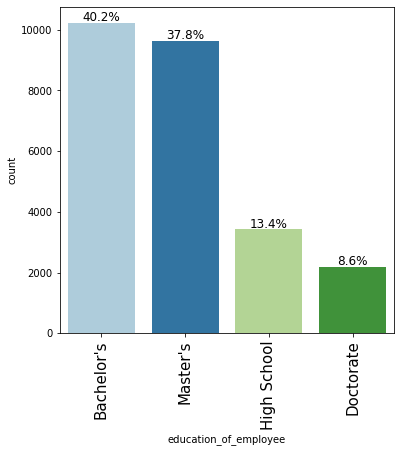

In [ ]:
labeled_barplot(data, 'education_of_employee', perc=True, n=None)

* Most applicants have Bachelor's or Master's degrees (~40%).

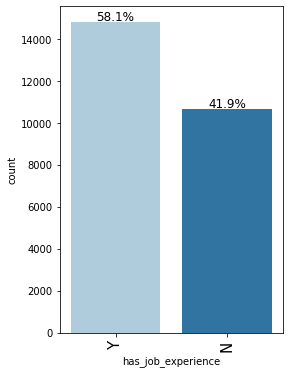

In [ ]:
labeled_barplot(data, 'has_job_experience', perc=True, n=None)

* Almost 40% of applicants do not have job experience.

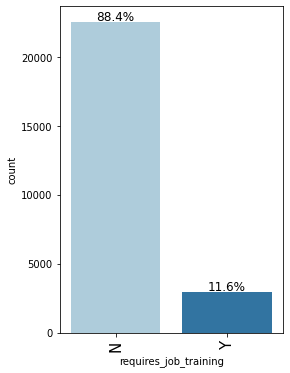

In [ ]:
labeled_barplot(data, 'requires_job_training', perc=True, n=None)

* Only a few applicants require training (~12%).

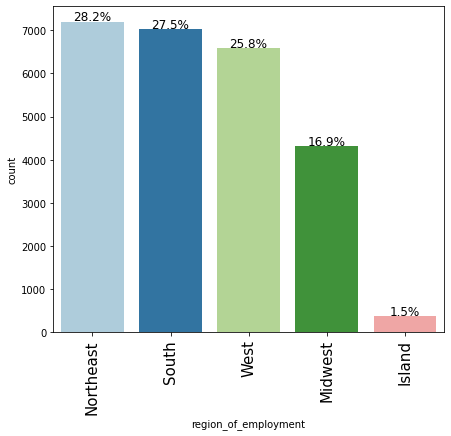

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True, n=None)

* Region of employment is evenly distributed between Northeast, South and West. 

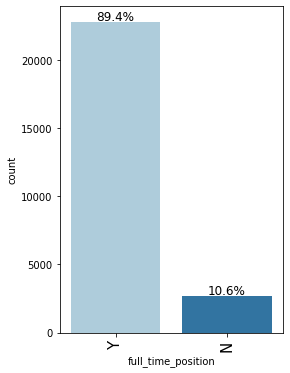

In [ ]:
labeled_barplot(data, 'full_time_position', perc=True, n=None)

* Nine out of ten applications are for a full-time position. 

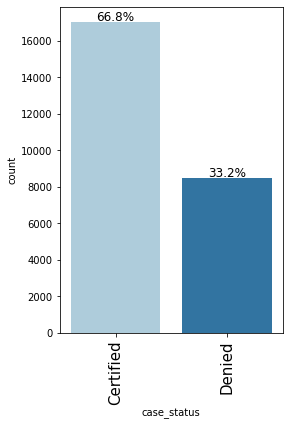

In [ ]:
labeled_barplot(data, 'case_status', perc=True, n=None)

* One third of applications are denied. 

## Bivariate analysis

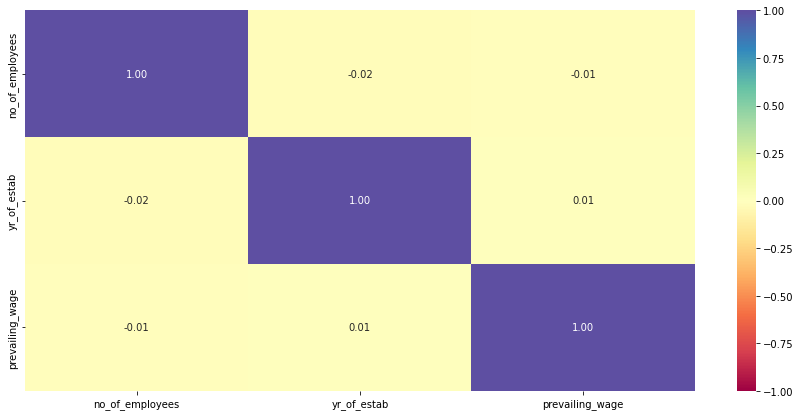

In [ ]:
#Plotting correlations between numerical variables 
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no correlations between numerical variables.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


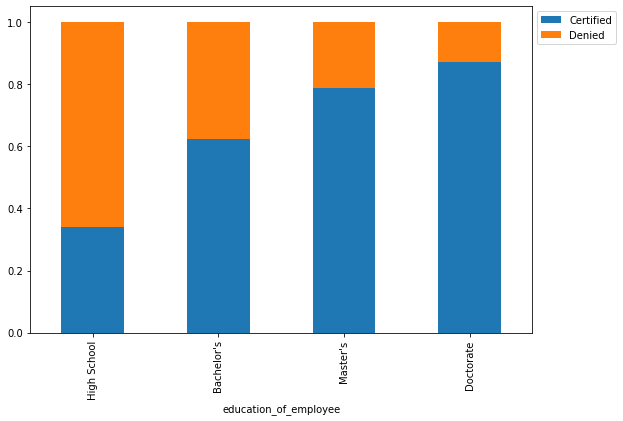

In [ ]:
stacked_barplot(data, 'education_of_employee', 'case_status')

* Applicants with a higher education status are certified more often. 
* ~90% of applicants with doctorate degrees were certified. 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


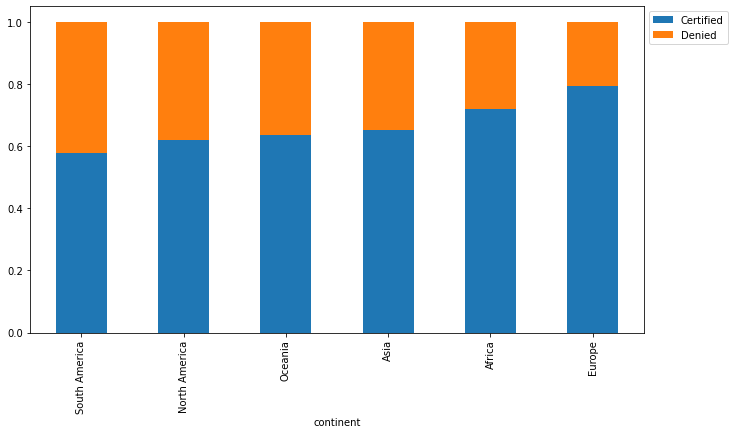

In [ ]:
stacked_barplot(data, 'continent', 'case_status')

* Applications from Europe were certified more often: ~80%.
* South America is the continent with the lowest rate of certifications: less than 60%.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


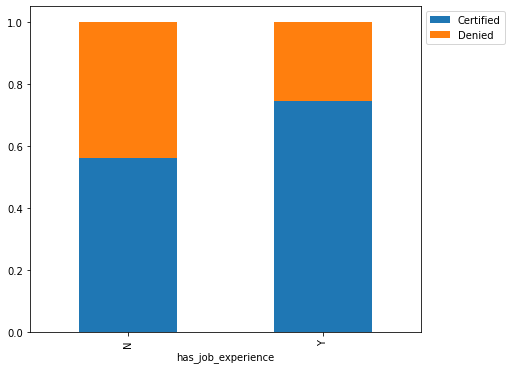

In [ ]:
stacked_barplot(data, 'has_job_experience', 'case_status')

* Applicants with job experience had a more significant rate of certification. 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


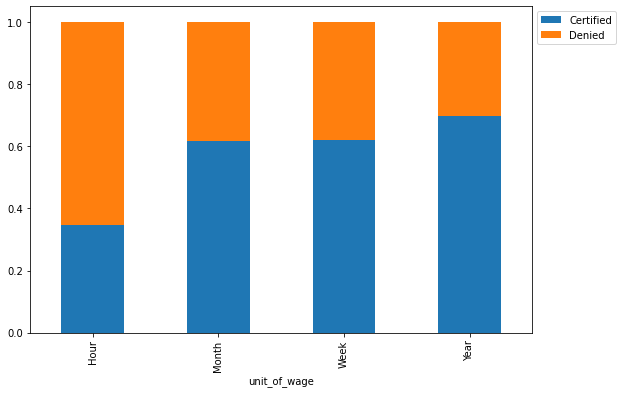

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status')

* A yearly salary is the pay unit most likely to be certified for a visa.
* On the other hand, applicants with an hourly pay unit were denied a visa at a significantly higher rate.   

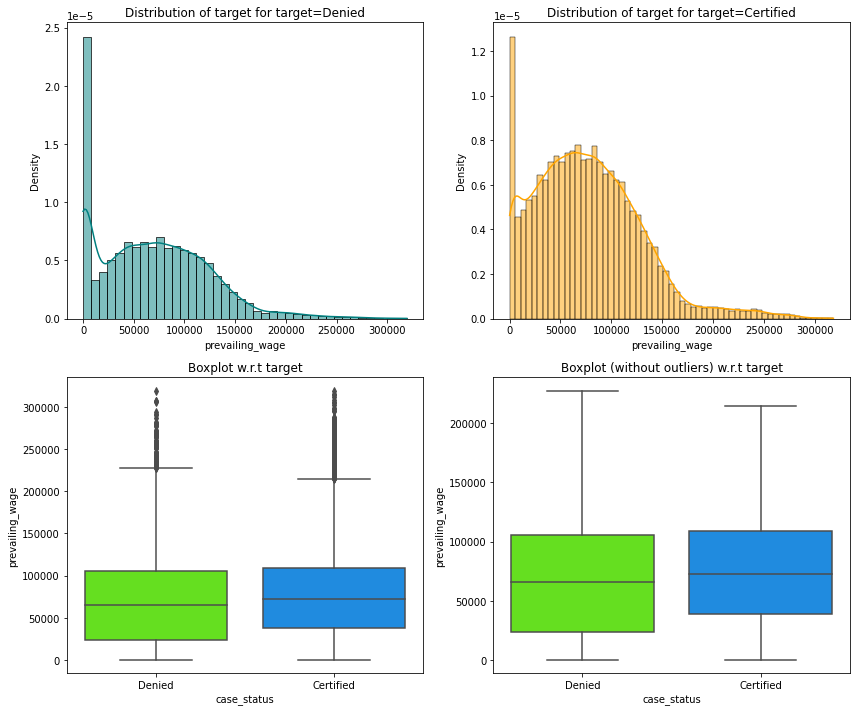

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status')

* Wage distributions are similar for certified and denied applications. 

### **EDA Insights**:

1. Education plays a significant role in Visa certification. Applicants with a higher education status are certified more often. For example, 9 out of 10 applicants with doctorate degrees got their Visas, while only 3 out of 10 with only high school education did.

2. Europe applications got a higher certification rate than other continents: close to 80%. South America is the continent with the lowest rate of certifications: less than 60%.
 
3. Having job experience significantly influence visa status. More than 75% of applicants with job experience were certified, while only 60% of inexperienced applicants got their Visas.  
 
4. Candidates whose prospective employers reported annual pay units were more successful in obtaining a Visa (about 70%) than those whose prospective employers reported hourly pay (<40%).
 
5. The visa status does not seem to change with the prevailing wage. Wage distributions are similar for certified and denied applications.

## Data Preprocessing

In [ ]:
data.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

### Feature engeneering

In [ ]:
# checking for unique values in ID column
data["case_id"].nunique()

25480

* Case ID shows unique applications.
* This column does not add any value to a prediction model, and we should drop it.

In [ ]:
# Dropping case_id
data.drop(["case_id"], axis=1, inplace=True)

In [ ]:
# Creating a dictionary to replace object-type values with numerical values
replaceStruct = {
                "education_of_employee":     {"High School": 1, "Bachelor's": 2 ,"Master's": 3 ,"Doctorate":4},
                "unit_of_wage": {"Hour": 1, "Week":2 , "Month": 3, "Year": 4},
                 "has_job_experience": {"N": 0, "Y": 1 },
                 "requires_job_training": {"N": 0, "Y": 1 },
                "full_time_position": {"N": 0, "Y": 1 },
                "case_status":     {"Denied": 0, "Certified": 1 } 
                    }

#Creating a list for other categorical variables
oneHotCols=["continent","region_of_employment"]

In [ ]:
# Replacing object-type values with numerical values
data1=data.replace(replaceStruct)

# Creating dummy variables and dropping first to avoid multicollinearity
data1=pd.get_dummies(data1, columns=oneHotCols, drop_first=True)
data1.head(10)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,1,0,0,14513,2007,592.2029,1,1,0,1,0,0,0,0,0,0,0,1
1,3,1,0,2412,2002,83425.6500,4,1,1,1,0,0,0,0,0,1,0,0
2,2,0,1,44444,2008,122996.8600,4,1,0,1,0,0,0,0,0,0,0,1
3,2,0,0,98,1897,83434.0300,4,1,0,1,0,0,0,0,0,0,0,1
4,3,1,0,1082,2005,149907.3900,4,1,1,0,0,0,0,0,0,0,1,0
5,3,1,0,2339,2012,78252.1400,4,1,1,1,0,0,0,0,0,0,1,0
6,2,0,0,4985,1994,53635.3900,4,1,1,1,0,0,0,0,0,0,1,0
7,2,1,0,3035,1924,418.2298,1,1,0,0,0,1,0,0,0,0,0,1
8,2,0,0,4810,2012,74362.1900,4,1,1,1,0,0,0,0,1,0,0,0
9,4,1,0,2251,1995,67514.7600,4,1,1,0,1,0,0,0,0,0,1,0


In [ ]:
# Checking we only have numerical data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   education_of_employee           25480 non-null  int64  
 1   has_job_experience              25480 non-null  int64  
 2   requires_job_training           25480 non-null  int64  
 3   no_of_employees                 25480 non-null  int64  
 4   yr_of_estab                     25480 non-null  int64  
 5   prevailing_wage                 25480 non-null  float64
 6   unit_of_wage                    25480 non-null  int64  
 7   full_time_position              25480 non-null  int64  
 8   case_status                     25480 non-null  int64  
 9   continent_Asia                  25480 non-null  uint8  
 10  continent_Europe                25480 non-null  uint8  
 11  continent_North America         25480 non-null  uint8  
 12  continent_Oceania               

* We only have numerical data now.

### Outlier detection and treatment

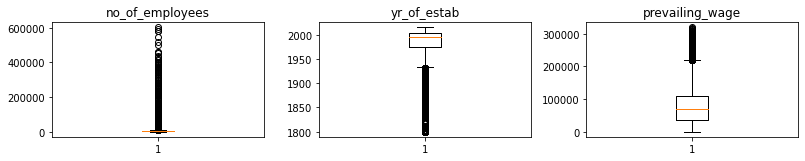

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

*   All the outliers seem like fair values.



### Data preparation for modeling

In [ ]:
# Splitting data in dependent and independent variables
X = data1.drop(['case_status'],axis=1)
y = data1['case_status']

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 17) (7644, 17)


In [ ]:
# Checking proportions in the dependent variable
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
# Checking proportions in the test set
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

* Proportions in the test set are correct.

### Functions to check model performance

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#Building bagging and boosting models


### The model can make wrong predictions as:
* Predicting an applicant will be denied and the applicant is certified.
* Indicating an applicant will be approved and the applicant is denied.

Which case is more important? Both are. Predicting a candidate will be denied but certified will result in losing a valuable prospect. On the other hand, shortlisting a candidate who should have been relegated would be a waste of resources for the OFLC. In an extreme case, a candidate without the appropriate qualifications could even fill a position better suited for a local candidate.
How to reduce False Negatives and False Positives? OFLC needs the F1 Score to be maximized.

### Decision Tree Model
We will build multiple models based on decision trees to find the best predictor for our classification problem.
We will pass a dictionary **{0:0.67,1:0.33}** to specify the weight of each class, and the decision tree will give more weightage to class 0. Why? For our decision tree classifier, we will try to balance the proportional weights for our dependent variable (case_status).

In [ ]:
# Creating our first model
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1)

In [ ]:
# Fitting our train model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

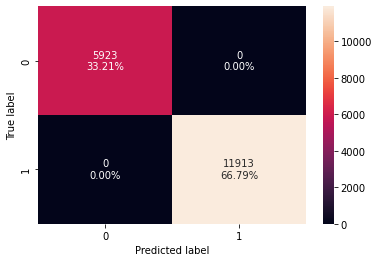

In [ ]:
# Visualizing the performance in the train set
confusion_matrix_sklearn(dtree, X_train, y_train)

In [ ]:
# Looking at the scores
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


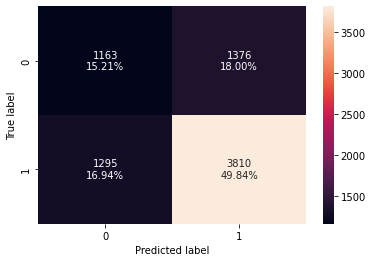

In [ ]:
# Visualizing the performance in the test set
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
# Looking at the scores for our test set
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.650576  0.746327    0.73467  0.740453


* Our first tree is obviously overfitted. 
* We will use some ensemble learning methods to improve our predictions.

# Bagging Classifier and Random Forest - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [ ]:
#Fitting the model
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

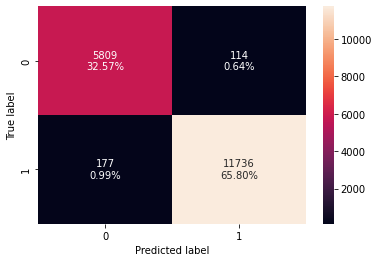

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging, X_train, y_train)

In [ ]:
#Calculating different metrics
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.983685  0.985142    0.99038  0.987754


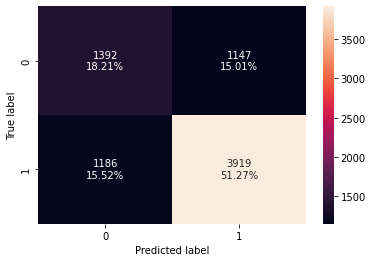

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
#Calculating different metrics
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.694793  0.767679   0.773589  0.770622


* Bagging Classifier is giving a higher test f1-score than our first decision tree but it is overfitting the training data.
* Let's try to balance the class weight.

### Bagging classifier with weighted decision tree

In [ ]:
#Fitting the model
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.67,1:0.33},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  random_state=1)

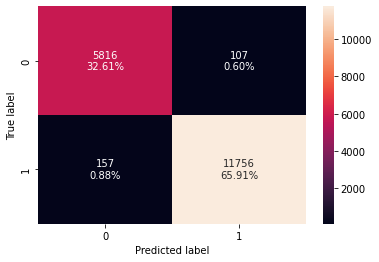

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

In [ ]:
#Calculating different metrics
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.985198  0.986821    0.99098  0.988896


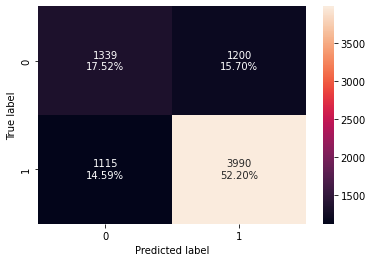

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
#Calculating different metrics
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.697148  0.781587   0.768786  0.775134


* Our F1 Score improved a little, but this model is also overfitting the training data. 

### Random forest

In [ ]:
#Fitting the model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

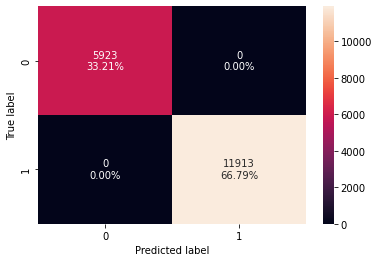

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf,X_train,y_train)

In [ ]:
#Calculating different metrics
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [ ]:
#Calculating different metrics
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722266  0.837806   0.767588  0.801161


* Our F1 Score keeps improving, but this model is overfitting the training data.
* Let's rerun the Random Forest Classifier with a balanced class weight.

### Random forest with class weights

In [ ]:
#Fitting the model
rf_wt = RandomForestClassifier(class_weight={0:0.67,1:0.33}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

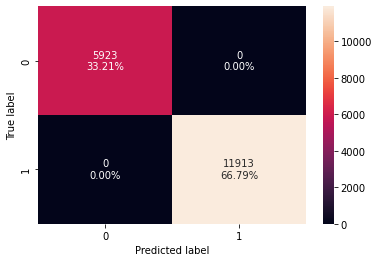

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_wt, X_train,y_train)

In [ ]:
#Calculating different metrics
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


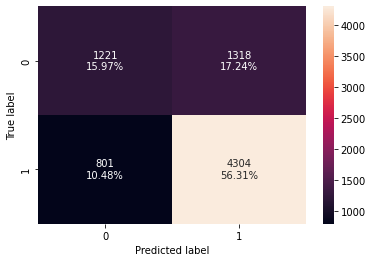

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
#Calculating different metrics
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.722789  0.843095   0.765564  0.802461


* This model also overfits our training data. 
* Our F1 Score improved marginally.
* Let's tune all the models we have created this far. 

### Tuning decision tree

In [ ]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,6), 
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes' : [5, 6, 7],
              'min_impurity_decrease': [0.001,0.01, 0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=4,
                       max_leaf_nodes=6, min_impurity_decrease=0.001,
                       random_state=1)

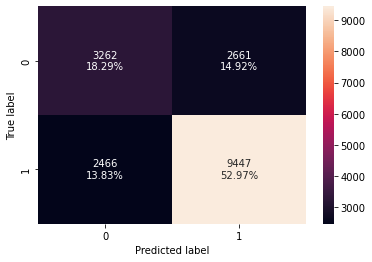

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.712548  0.792999   0.780228  0.786562


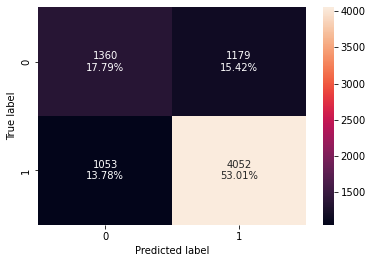

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [ ]:
#Calculating different metrics
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.708006  0.793732   0.774613  0.784056


* Good news! This is the first model that doesn't seem to overfit the training data. 
* The F1 Score for the training data is somewhat low.

### Tuning bagging classifier

In [ ]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[75, 101,125],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'f1', cv = 5)
grid.fit(X_train, y_train)

## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.8, n_estimators=125, random_state=1)

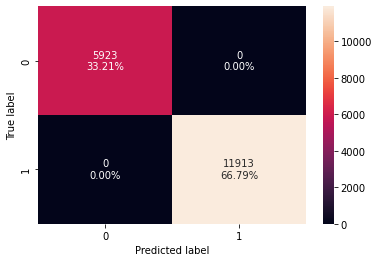

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [ ]:
#Calculating different metrics
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


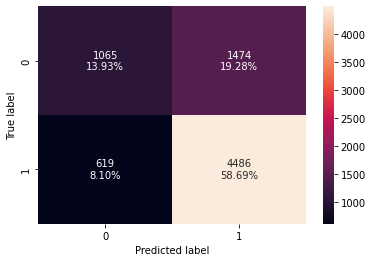

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [ ]:
#Calculating different metrics
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.72619  0.878746   0.752685  0.810845


* We got a better performance for the F1 Score.
* Nevertheless, this model overfits the training data. 

### Tuning Random Forest

In [ ]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [1000],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='f1',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', max_samples=0.7, min_samples_leaf=5,
                       n_estimators=1000, random_state=1)

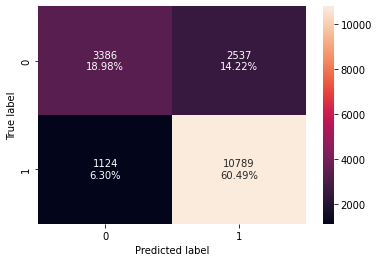

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [ ]:
#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.794741  0.905649    0.80962  0.854947


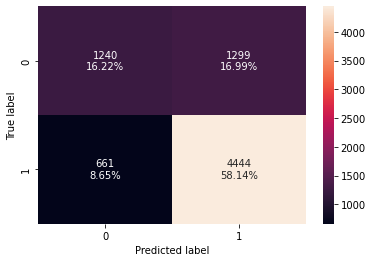

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [ ]:
#Calculating different metrics
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.74359  0.870519   0.773812  0.819322


* This is our best model yet. 
* The model seems to be fitting the training data properly.
* Our F1 Score is noticeably improved after tuning the model.

### Comparing the models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,1.0,0.983685,0.985198,1.0,1.0,0.712548,1.0,0.794741
Recall,1.0,0.985142,0.986821,1.0,1.0,0.792999,1.0,0.905649
Precision,1.0,0.990380,0.990980,1.0,1.0,0.780228,1.0,0.809620
F1,1.0,0.987754,0.988896,1.0,1.0,0.786562,1.0,0.854947


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator
Accuracy,0.650576,0.694793,0.697148,0.722266,0.722789,0.708006,0.726190,0.743590
Recall,0.746327,0.767679,0.781587,0.837806,0.843095,0.793732,0.878746,0.870519
Precision,0.734670,0.773589,0.768786,0.767588,0.765564,0.774613,0.752685,0.773812
F1,0.740453,0.770622,0.775134,0.801161,0.802461,0.784056,0.810845,0.819322


* Except for the tuned iterations of Decision Tree and Random Forest, all models tend to overfit the training data. 
* Bagging classifier overfitted the data before and after tuning.
* Our tuned Random Forest is our best model, with **0.8193** F1 Score.
* Let's try some Boosting techniques.

# Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Classifier



In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.738002  0.887686   0.760244  0.819037


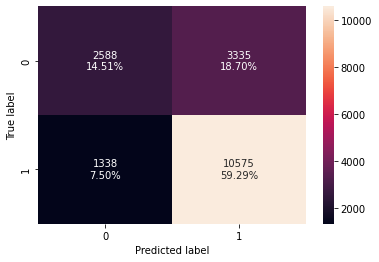

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_train,y_train)

In [ ]:
#Calculating different metrics
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.732339  0.884427   0.756155  0.815276


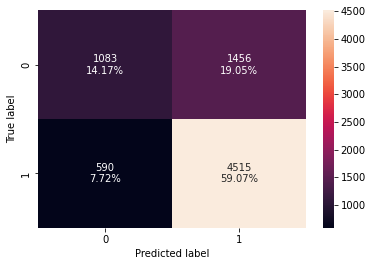

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* The training and test data metrics are pretty close, indicating our model is not overfitting the data. 
* The model performed very well for the F1 Score.

### Tuning AdaBoost Classifier

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.30000000000000004, n_estimators=20,
                   random_state=1)

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.754205  0.884328   0.778008  0.827768


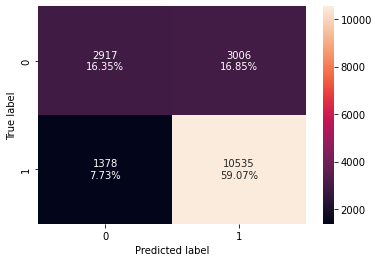

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_train,y_train)

In [ ]:
#Calculating different metrics
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

   Accuracy   Recall  Precision        F1
0  0.743066  0.87855   0.769429  0.820377


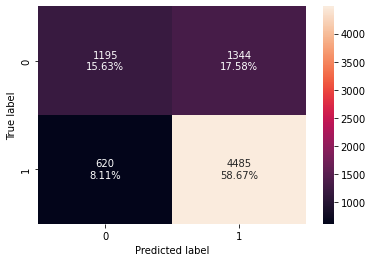

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* Tuning resulted in a noticeable improvement in our model performance. 
* No overfitting detected. 

### Gradient Boosting Classifier

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757793  0.882649   0.782541  0.829586


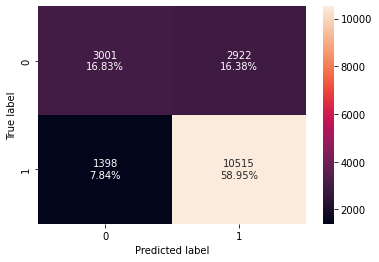

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_train,y_train)

In [ ]:
#Calculating different metrics
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745814  0.877767   0.772586  0.821825


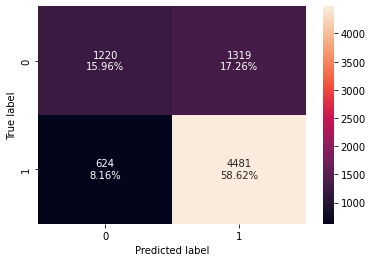

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* Gradient Boosting gave us a robust model. 
* No overfitting and our best F1 Score yet. 

### Tuning Gradient Boosting Classifier



In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 100, 200],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=50, random_state=1,
                           subsample=0.9)

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0    0.7537  0.880719   0.779263  0.82689


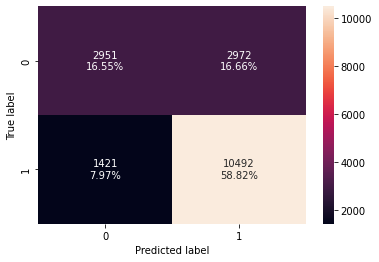

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)

In [ ]:
#Calculating different metrics
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.744898  0.875808   0.772594  0.82097


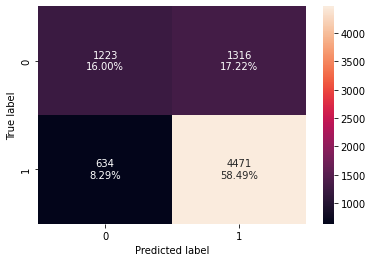

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* This is still an excellent model, but we could not identify any improvement in metrics after tuning it. 

### XGBoost Classifier

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [ ]:
#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756055  0.881558   0.781283  0.828397


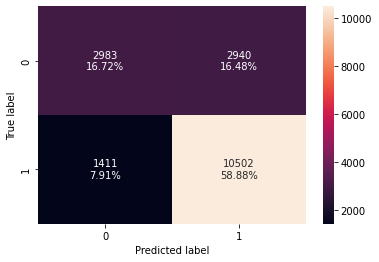

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_train,y_train)

In [ ]:
#Calculating different metrics
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746599  0.877571   0.773481  0.822245


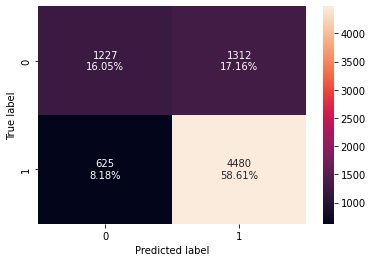

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* XGBoost improved our metrics. Let's see what hyperparameter tuning can do.

### Tuning XGBoost Classifier

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, eval_metric='logloss', n_estimators=50,
              random_state=1, subsample=0.7)

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.752859  0.88693   0.775372  0.827408


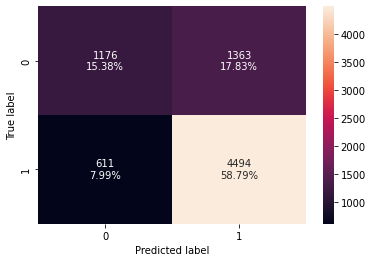

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

In [ ]:
#Calculating different metrics
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.741758  0.880313   0.767287  0.819923


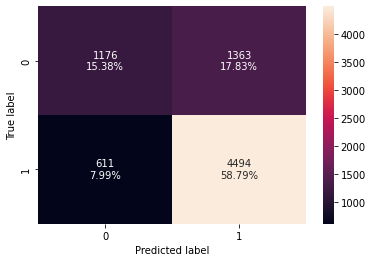

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

# Stacking Model

In [ ]:
#Defining variables to feed the Stacking Model
estimators = [('Random Forest',rf_estimator), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]
final_estimator = xgb_tuned

#Fitting the model
stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)
stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_features='log2',
                                                       max_samples=0.7,
                                                       min_samples_leaf=5,
                                                       n_estimators=1000,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.6

Training performance:
    Accuracy    Recall  Precision        F1
0  0.774557  0.886511   0.798262  0.840075
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746468  0.869344   0.777369  0.820788


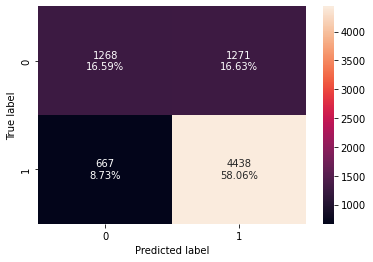

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* Stacking performs very well, but the model does not show an apparent improvement compared with previous models.
* Let's compare all our models. 

# Comparing models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T, ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator", 
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.983685,0.985198,1.0,1.0,0.712548,1.0,0.794741,0.738002,0.754205,0.757793,0.753700,0.756055,0.752859,0.774557
Recall,1.0,0.985142,0.986821,1.0,1.0,0.792999,1.0,0.905649,0.887686,0.884328,0.882649,0.880719,0.881558,0.886930,0.886511
Precision,1.0,0.990380,0.990980,1.0,1.0,0.780228,1.0,0.809620,0.760244,0.778008,0.782541,0.779263,0.781283,0.775372,0.798262
F1,1.0,0.987754,0.988896,1.0,1.0,0.786562,1.0,0.854947,0.819037,0.827768,0.829586,0.826890,0.828397,0.827408,0.840075


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T, ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator", 
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_test_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Random Forest Classifier,Weighted Random Forest Classifier,Decision Tree Estimator,Bagging Estimator,Random Forest Estimator,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.650576,0.694793,0.697148,0.722266,0.722789,0.708006,0.726190,0.743590,0.732339,0.743066,0.745814,0.744898,0.746599,0.741758,0.746468
Recall,0.746327,0.767679,0.781587,0.837806,0.843095,0.793732,0.878746,0.870519,0.884427,0.878550,0.877767,0.875808,0.877571,0.880313,0.869344
Precision,0.734670,0.773589,0.768786,0.767588,0.765564,0.774613,0.752685,0.773812,0.756155,0.769429,0.772586,0.772594,0.773481,0.767287,0.777369
F1,0.740453,0.770622,0.775134,0.801161,0.802461,0.784056,0.810845,0.819322,0.815276,0.820377,0.821825,0.820970,0.822245,0.819923,0.820788


* XGBoost Classifier is the best performer model. Gradient Boost Classifier is a close second tier. 
* XGBoost performed better for all the metrics, except for Recall, where Gradient Boost Classifier had a marginally better performance (0.02 percent points better).  
* Boosting techniques, in general, showed to be very effective in improving our predictions.

## Feature importance of XGBoost Classifier

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgb_classifier.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
education_of_employee           0.212816
unit_of_wage                    0.180475
has_job_experience              0.151876
continent_Europe                0.079076
region_of_employment_South      0.063937
region_of_employment_Midwest    0.054735
region_of_employment_Northeast  0.046620
region_of_employment_West       0.038529
continent_Asia                  0.033756
full_time_position              0.025309
prevailing_wage                 0.024751
continent_North America         0.023265
continent_South America         0.021819
requires_job_training           0.013614
yr_of_estab                     0.010991
continent_Oceania               0.009504
no_of_employees                 0.008927


In [ ]:
feature_names = X_train.columns

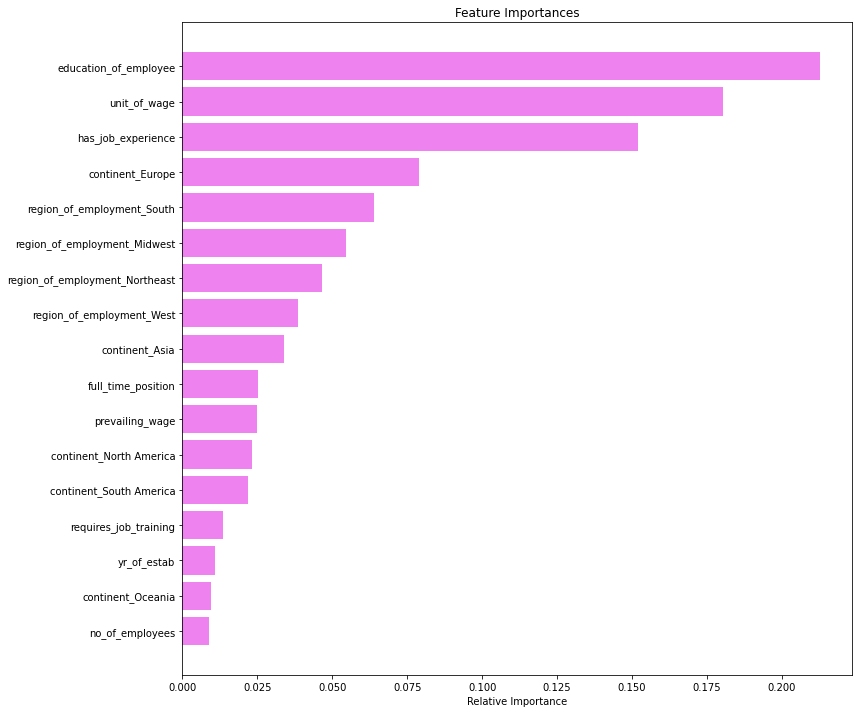

In [ ]:
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* The education of the employee is the most important feature for prediction followed by Unit of wage, and if the employee has job experience or not.

## Actionable Insights and Recommendations

* We have been able to build a predictive model: a) that the OFLC can use to shortlist visa applicants, b) that the Office can use to project its resource allocation better, and c) based on which the U.S. Department of Labor can better promote policies that enhance U.S. competitivity in global labor markets.

* Based on our analysis, we can say that the drivers that significantly influence a positive case status are:
  - Higher education degrees
  - Longer units of wage
  - Having job experience
  - Coming from Europe
  - Region of employment being South

* It is striking that whether or not the application is for a full-time position does not play such an essential role in predicting certification. Nor does the 'prevailing wage' variable play such an important role in the prediction.

* Company attributes are not that significant either. The number of employees and the year of establishment are among the least important features.

* We recommend that, in those cases where the local labor force does not meet the needs of the US market, the Department of Labor creates incentive policies that are attractive to candidates abroad with work experience and high academic qualifications.

* We recommend that the OFLC set up a consultancy program with companies that wish to attract workforce from abroad. Knowing the drivers that significantly influence a case status will save companies from investing time and resources in submitting unpromising applications. This collaboration will also help the OFLC save resources proactively.

* It is necessary to carry out deeper analyses to understand the disparities in visa certification according to the continent of origin. Some questions to continue the study could be, for example, if candidates from certain regions have lower educational levels or do not have work experience.

* It would also be worth looking into what type of position companies seek to fill and whether there are particular regions where they direct their recruiting efforts.